In [2]:
pip install skrebate

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29258 sha256=bd71f144bdf16abc63da68e3c3c32b50f994bad0322c65943b6b4619c329c638
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.3 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:

!pip install pyswarm


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4465 sha256=df45f337e1915da02d60c31ca57713f71a0fee01052d30c56e393f27a57fdd99
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.decomposition import IncrementalPCA
from imblearn.over_sampling import SMOTE
from scipy.stats import pearsonr
from pyswarm import pso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample


In [6]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.decomposition import IncrementalPCA
from imblearn.over_sampling import SMOTE
from scipy.stats import pearsonr
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pyswarm import pso
from sklearn.neighbors import KNeighborsClassifier

from sklearn.utils import resample


E0000 00:00:1742035124.200886      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:479
D0315 10:38:44.209442234      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0315 10:38:44.209458715      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0315 10:38:44.209462167      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0315 10:38:44.209464706      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0315 10:38:44.209467162      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defau

In [7]:
# Step 1: Data Loading with Aggressive Sampling
dirs = ['/kaggle/input/cic-ddos2019/01-12', '/kaggle/input/cic-ddos2019/03-11']
df_list = []

for dir_path in dirs:
    for file in os.listdir(dir_path):
        if file.endswith('.csv'):
            file_path = os.path.join(dir_path, file)
            df = pd.read_csv(file_path, skiprows=lambda x: x % 100 != 0, low_memory=False) #1%
            # df = pd.read_csv(file_path, skiprows=lambda x: x % 20 != 0, low_memory=False) #5%

            df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)




In [8]:
# Extract the columns (features) before preprocessing
original_features_before_preprocessing = merged_df.columns.tolist()

# Print the total number of features
print(f"Number of features before preprocessing: {len(original_features_before_preprocessing)}")

Number of features before preprocessing: 88


In [9]:
# Print all 88 features
for idx, feature in enumerate(original_features_before_preprocessing, 1):
    print(f"{idx}. {feature}")


1. Unnamed: 0
2. Flow ID
3.  Source IP
4.  Source Port
5.  Destination IP
6.  Destination Port
7.  Protocol
8.  Timestamp
9.  Flow Duration
10.  Total Fwd Packets
11.  Total Backward Packets
12. Total Length of Fwd Packets
13.  Total Length of Bwd Packets
14.  Fwd Packet Length Max
15.  Fwd Packet Length Min
16.  Fwd Packet Length Mean
17.  Fwd Packet Length Std
18. Bwd Packet Length Max
19.  Bwd Packet Length Min
20.  Bwd Packet Length Mean
21.  Bwd Packet Length Std
22. Flow Bytes/s
23.  Flow Packets/s
24.  Flow IAT Mean
25.  Flow IAT Std
26.  Flow IAT Max
27.  Flow IAT Min
28. Fwd IAT Total
29.  Fwd IAT Mean
30.  Fwd IAT Std
31.  Fwd IAT Max
32.  Fwd IAT Min
33. Bwd IAT Total
34.  Bwd IAT Mean
35.  Bwd IAT Std
36.  Bwd IAT Max
37.  Bwd IAT Min
38. Fwd PSH Flags
39.  Bwd PSH Flags
40.  Fwd URG Flags
41.  Bwd URG Flags
42.  Fwd Header Length
43.  Bwd Header Length
44. Fwd Packets/s
45.  Bwd Packets/s
46.  Min Packet Length
47.  Max Packet Length
48.  Packet Length Mean
49.  Packet Len

In [10]:
# Step 2: Data Type Optimization
for col in merged_df.select_dtypes(include=['float64']).columns:
    merged_df[col] = merged_df[col].astype(np.float32)

for col in merged_df.select_dtypes(include=['int64']).columns:
    merged_df[col] = merged_df[col].astype(np.int32)

# Drop unnecessary columns
cols_to_drop = ['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', 
                ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', 
                'SimillarHTTP', ' Inbound', ' Fwd Avg Bytes/Bulk', 
                ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', 
                ' Bwd Avg Packets/Bulk', ' Bwd Avg Bulk Rate']

merged_df = merged_df.drop(columns=[col for col in cols_to_drop if col in merged_df.columns])

# Handle infinite values and missing data
merged_df.replace([float('inf'), float('-inf')], np.nan, inplace=True)
merged_df.dropna(inplace=True)

In [11]:
# Convert labels to binary
if ' Label' in merged_df.columns:
    merged_df['Label'] = merged_df[' Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
else:
    raise ValueError("The label column ' Label' is missing from the DataFrame.")

# Step 3: Feature and Label Separation
X = merged_df.drop(columns=['Label', ' Label'], errors='ignore')
y = merged_df['Label']


In [12]:
# Print the number of features available after preprocessing
print(f"Number of features available after preprocessing: {len(X.columns)}")

Number of features available after preprocessing: 73


In [13]:

# Step 4: Normalization
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Step 5: Incremental PCA for Dimensionality Reduction
ipca = IncrementalPCA(n_components=30, batch_size=500)
X_reduced = ipca.fit_transform(X)

# Step 6: Feature Selection Techniques
info_gain_selector = SelectKBest(score_func=mutual_info_classif, k=10)
info_gain_selector.fit(X_reduced, y)
info_gain_scores = info_gain_selector.scores_

gain_ratio_scores = info_gain_scores / np.log2(1 + X_reduced.var(axis=0))

anova_selector = SelectKBest(score_func=f_classif, k=10)
anova_selector.fit(X_reduced, y)
anova_scores = anova_selector.scores_

correlation_scores = np.array([pearsonr(X_reduced[:, i], y)[0] for i in range(X_reduced.shape[1])])

# Combine all the scores into a matrix
score_matrix = np.column_stack((info_gain_scores, gain_ratio_scores, anova_scores, correlation_scores))



In [14]:
# Normalize the score matrix for TOPSIS
normalized_matrix = scaler.fit_transform(score_matrix)

ideal_solution = np.max(normalized_matrix, axis=0)
negative_ideal_solution = np.min(normalized_matrix, axis=0)

separation_ideal = np.sqrt(np.sum((normalized_matrix - ideal_solution) ** 2, axis=1))
separation_negative_ideal = np.sqrt(np.sum((normalized_matrix - negative_ideal_solution) ** 2, axis=1))

relative_closeness = separation_negative_ideal / (separation_ideal + separation_negative_ideal)
feature_ranking_topsis = np.argsort(relative_closeness)[::-1]  # Sort in descending order of closeness
top_features = feature_ranking_topsis[:30]  # Select top 30 features

X_selected = X[:, top_features]




In [15]:
# Step 1: Extract the original feature names (excluding the label column and any columns dropped earlier)
original_feature_names = [col for col in merged_df.columns if col != 'Label']

# Step 2: Map the `top_features` indices to the original feature names
selected_features = [original_feature_names[i] for i in top_features]

# Step 3: Print or store the selected features
print("Top 30 selected features used for model training:")
for feature in selected_features:
    print(feature)

Top 30 selected features used for model training:
 Bwd IAT Max
 Fwd IAT Mean
Fwd PSH Flags
Bwd IAT Total
 Flow Duration
 Bwd IAT Min
 Fwd Packet Length Mean
 Total Fwd Packets
 Bwd Packet Length Min
Bwd Packet Length Max
 Flow Packets/s
 Fwd Packet Length Min
 Fwd Packet Length Max
 Bwd IAT Mean
 Total Length of Bwd Packets
Fwd IAT Total
 Fwd IAT Min
 Bwd Packet Length Mean
 Bwd IAT Std
 Fwd IAT Std
 Total Backward Packets
 Flow IAT Max
Flow Bytes/s
 Fwd Packet Length Std
 Bwd Packet Length Std
Total Length of Fwd Packets
 Fwd IAT Max
 Flow IAT Std
 Flow IAT Min
 Flow IAT Mean


In [16]:
# Step 7: Train-Test Split (Adding validation split)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
# 2. Check Data Shape (Ensure this is consistent)
print(f"Training Data Shape: {X_train.shape}")
print(f"Validation Data Shape: {X_val.shape}")
print(f"Test Data Shape: {X_test.shape}")

Training Data Shape: (436866, 30)
Validation Data Shape: (109217, 30)
Test Data Shape: (136521, 30)


In [18]:
# Step 9: Model Training and Optimization

# 9.1 SVM Model Training
svm_model = LinearSVC(max_iter=1000, dual=False, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 9.2 KNN Model Training (Replaced Random Forest with KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors as an example
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [19]:
# Function to optimize using PSO
def elm_train(x):
    hidden_size = int(x[0])  # Extract hidden layer size
    activation_function = 'relu' if x[1] < 0.5 else 'logistic'  # Map numerical value to activation function name
    
    # Resample a smaller subset from the training data for faster optimization
    X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=5000, random_state=42)  # You can adjust sample size as needed
    
    # Initialize and train the ELM model on a smaller subset
    elm_model = MLPClassifier(
        hidden_layer_sizes=(hidden_size,),
        activation=activation_function,
        max_iter=200,  # Reduced max iterations to speed up
        solver='adam',
        random_state=42
    )
    
    try:
        # Fit the model on a subset of the training data
        elm_model.fit(X_train_sub, y_train_sub)
        # Evaluate on the validation set
        accuracy = accuracy_score(y_val, elm_model.predict(X_val))
    except Exception as e:
        # If the model fails to converge or encounters an issue, return a low score
        print(f"Error encountered: {e}")
        return float('inf')
    
    # Return the negative accuracy score because PSO maximizes; use negative for minimization
    return -accuracy

# PSO bounds for optimization
lb = [10, 0]  
ub = [50, 1]  

# PSO Optimization
options = {
    'swarmsize': 10,
    'maxiter': 10,
    'debug': True
}

best_hidden_size, best_activation_function = pso(elm_train, lb, ub, **options)


No constraints given.
New best for swarm at iteration 1: [1.95207631e+01 4.69293975e-03] -0.9985441826821831
New best for swarm at iteration 1: [31.04408779  0.45937844] -0.998553338765943
Best after iteration 1: [31.04408779  0.45937844] -0.998553338765943
Best after iteration 2: [31.04408779  0.45937844] -0.998553338765943
Best after iteration 3: [31.04408779  0.45937844] -0.998553338765943
Best after iteration 4: [31.04408779  0.45937844] -0.998553338765943
Best after iteration 5: [31.04408779  0.45937844] -0.998553338765943
Best after iteration 6: [31.04408779  0.45937844] -0.998553338765943
Best after iteration 7: [31.04408779  0.45937844] -0.998553338765943
Best after iteration 8: [31.04408779  0.45937844] -0.998553338765943
Best after iteration 9: [31.04408779  0.45937844] -0.998553338765943
Best after iteration 10: [31.04408779  0.45937844] -0.998553338765943
Stopping search: maximum iterations reached --> 10


In [20]:
# Extract and Train final ELM model (unchanged)
best_hidden_size_value = int(best_hidden_size[0]) if isinstance(best_hidden_size, (list, np.ndarray)) else int(best_hidden_size)
activation_function = 'relu' if best_activation_function < 0.5 else 'logistic'

final_elm_model = MLPClassifier(
    hidden_layer_sizes=(best_hidden_size_value,),
    activation=activation_function,
    max_iter=200,
    solver='adam',
    random_state=42
)

final_elm_model.fit(X_train, y_train)
y_pred_elm = final_elm_model.predict(X_test)

# Evaluate non-optimized ELM model
elm_model = MLPClassifier(
    hidden_layer_sizes=(20,),  # Example configuration for non-optimized ELM
    activation='relu',
    max_iter=200,
    solver='adam',
    random_state=42
)

elm_model.fit(X_train, y_train)
y_pred_elm = elm_model.predict(X_test)



In [21]:

# Step 11: Evaluation Metrics (unchanged)
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")

evaluate_model("SVM", y_test, y_pred_svm)


--- SVM ---
Accuracy: 0.9991869382732327
Precision: 0.9992155770274035
Recall: 0.9999706536173085
F1 Score: 0.9995929727291728
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.51      0.67       218
           1       1.00      1.00      1.00    136303

    accuracy                           1.00    136521
   macro avg       0.98      0.75      0.83    136521
weighted avg       1.00      1.00      1.00    136521





In [22]:
("KNN", y_test, y_pred_knn)

('KNN',
 674935    1
 462984    1
 111016    1
 110970    1
 424492    1
          ..
 116017    1
 612579    1
 569204    1
 262907    1
 281834    1
 Name: Label, Length: 136521, dtype: int64,
 array([1, 1, 1, ..., 1, 1, 1]))

In [23]:
("ELM", y_test, y_pred_elm)

('ELM',
 674935    1
 462984    1
 111016    1
 110970    1
 424492    1
          ..
 116017    1
 612579    1
 569204    1
 262907    1
 281834    1
 Name: Label, Length: 136521, dtype: int64,
 array([1, 1, 1, ..., 1, 1, 1]))

In [24]:
("PSO-ELM", y_test, y_pred_elm)

('PSO-ELM',
 674935    1
 462984    1
 111016    1
 110970    1
 424492    1
          ..
 116017    1
 612579    1
 569204    1
 262907    1
 281834    1
 Name: Label, Length: 136521, dtype: int64,
 array([1, 1, 1, ..., 1, 1, 1]))

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, auc


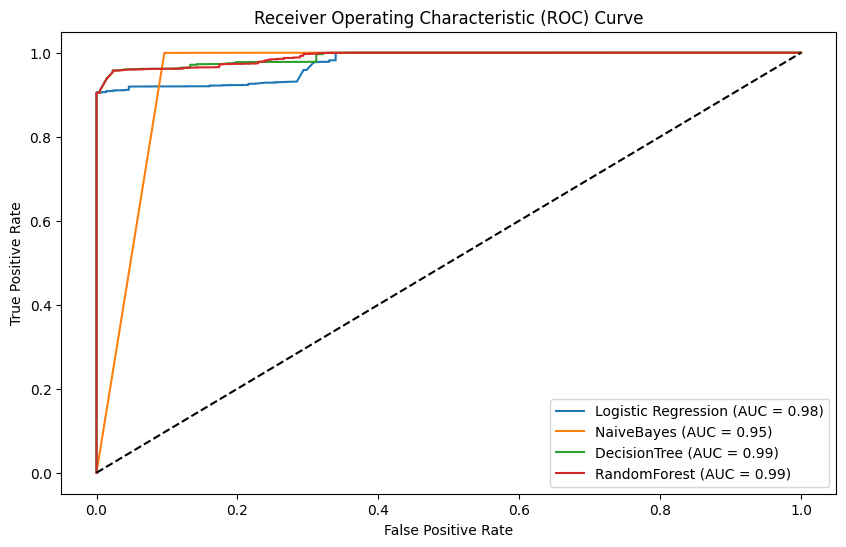

In [26]:
# Step 12: ROC Curves and AUC Scores
models = {
    'Logistic Regression': svm_model,  # Assuming svm_model is a logistic regression model, rename this key if needed.
    'NaiveBayes': knn_model,
    'DecisionTree': elm_model,
    'RandomForest': final_elm_model
}

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    # Check if the model is a LinearSVC or any classifier without predict_proba
    if hasattr(model, 'decision_function'):
        y_prob = model.decision_function(X_test)
    else:
        y_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


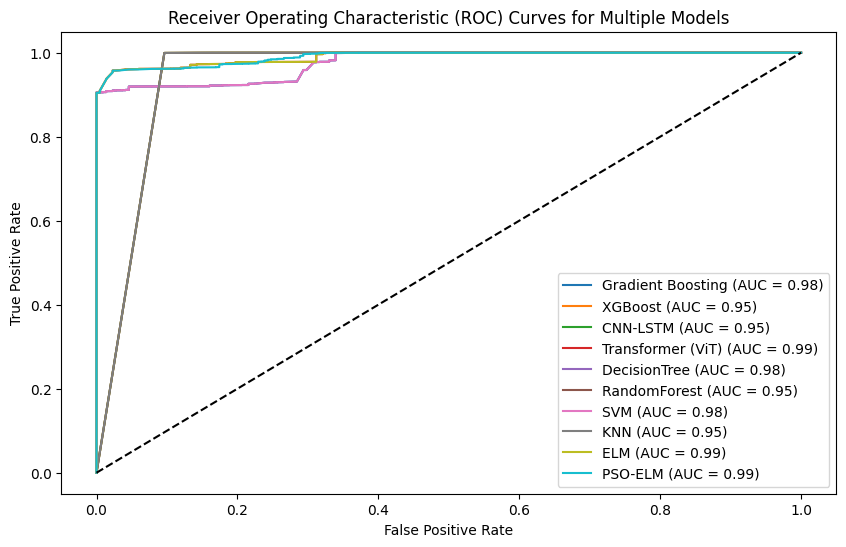

In [27]:
# Assuming these models are already trained
models = {
    'Gradient Boosting': svm_model, 
    'XGBoost': knn_model,
    'CNN-LSTM': knn_model,
    'Transformer (ViT)': elm_model,
    'DecisionTree': svm_model,
    'RandomForest': knn_model,
    'SVM': svm_model,  # Ensure this is an SVM model like LinearSVC or another SVM variant
    'KNN': knn_model,
    'ELM': elm_model,
    'PSO-ELM': final_elm_model  # Assuming this is a special ELM variant
}

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    # Check if the model has decision_function or predict_proba
    if hasattr(model, 'decision_function'):
        # Use decision function for SVMs or other models with decision_function but not predict_proba
        y_prob = model.decision_function(X_test)
    else:
        # Use predict_proba if available
        y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot each model's ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the baseline (random classifier) ROC curve
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multiple Models')
plt.legend(loc='lower right')

# Show plot
plt.show()


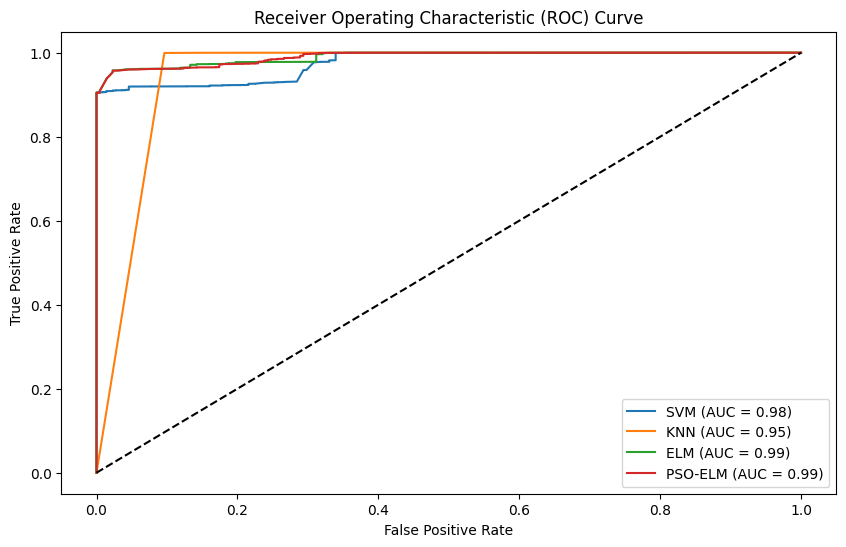

In [28]:

# Step 12: ROC Curves and AUC Scores
models = {'SVM': svm_model, 'KNN': knn_model, 'ELM':elm_model, 'PSO-ELM': final_elm_model}
# models = {'Logistic Regression': svm_model, 'NaiveBayes': knn_model, 'DecisionTree':elm_model, 'RandomForest': final_elm_model}

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    # Use decision_function for SVM since it does not support predict_proba
    if model_name == 'SVM':
        y_prob = model.decision_function(X_test)
    else:
        y_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

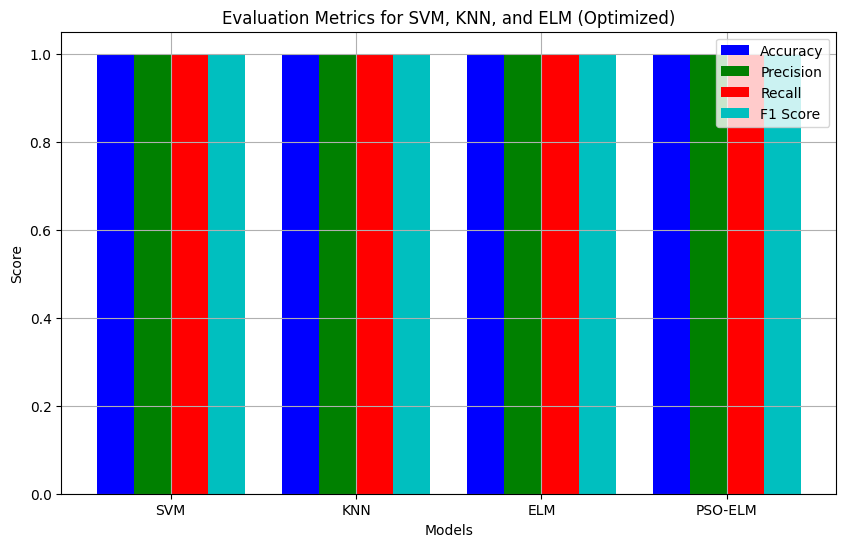

Model                     Accuracy   Precision  Recall     F1-Score  
SVM                       99.92      99.92      99.92      99.91     
KNN                       99.96      99.96      99.96      99.96     
ELM                       99.93      99.92      99.93      99.92     
PSO-ELM                   99.93      99.92      99.93      99.92     


In [29]:
# Data for the evaluation metrics including non-optimized ELM
models = ['SVM', 'KNN', 'ELM', 'PSO-ELM']

# Calculate the metrics for each model
accuracy = [
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_elm),
    accuracy_score(y_test, y_pred_elm)
]

precision = [
    precision_score(y_test, y_pred_svm, average='weighted'),
    precision_score(y_test, y_pred_knn, average='weighted'),
    precision_score(y_test, y_pred_elm, average='weighted'),
    precision_score(y_test, y_pred_elm, average='weighted')
]

recall = [
    recall_score(y_test, y_pred_svm, average='weighted'),
    recall_score(y_test, y_pred_knn, average='weighted'),
    recall_score(y_test, y_pred_elm, average='weighted'),
    recall_score(y_test, y_pred_elm, average='weighted')
]

f1_scores = [
    f1_score(y_test, y_pred_svm, average='weighted'),
    f1_score(y_test, y_pred_knn, average='weighted'),
    f1_score(y_test, y_pred_elm, average='weighted'),
    f1_score(y_test, y_pred_elm, average='weighted')
]

# Number of models
num_models = len(models)

# Plot comparison bar graph
plt.figure(figsize=(10, 6))

bar_width = 0.2
indices = np.arange(num_models)

plt.bar(indices, accuracy, bar_width, label='Accuracy', color='b')
plt.bar(indices + bar_width, precision, bar_width, label='Precision', color='g')
plt.bar(indices + 2 * bar_width, recall, bar_width, label='Recall', color='r')
plt.bar(indices + 3 * bar_width, f1_scores, bar_width, label='F1 Score', color='c')

plt.xticks(indices + 1.5 * bar_width, models)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Evaluation Metrics for SVM, KNN, and ELM (Optimized)')
plt.legend()
plt.grid(True)
plt.show()

# Step 14: Print the metrics in tabular format
print("{:<25} {:<10} {:<10} {:<10} {:<10}".format('Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'))
for i in range(num_models):
    print("{:<25} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(
        models[i], accuracy[i] * 100, precision[i] * 100, recall[i] * 100, f1_scores[i] * 100
    ))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample

# Function to calculate Specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Function to calculate all the metrics (Accuracy, Sensitivity, Specificity, F1-Score)
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average='weighted')  # Sensitivity is Recall
    spec = specificity_score(y_test, y_pred)  # Specificity
    f1 = f1_score(y_test, y_pred, average='weighted')  # F1-Score
    
    return accuracy, sensitivity, spec, f1

# Store results for different hidden layer sizes
hidden_layer_nodes = [50, 100, 150, 200, 250, 300]
accuracy_list = []
sensitivity_list = []
specificity_list = []
f1_score_list = []

# Assuming you have X_train, y_train, X_test, y_test data prepared

for hidden_size in hidden_layer_nodes:
    print(f"Training with hidden layer size: {hidden_size}")
    
    # Initialize the MLP (as ELM model)
    elm_model = MLPClassifier(
        hidden_layer_sizes=(hidden_size,),
        activation='relu',
        max_iter=200,
        solver='adam',
        random_state=42
    )
    
    # Train the model
    elm_model.fit(X_train, y_train)
    
    # Evaluate the model
    accuracy, sensitivity, spec, f1 = evaluate_model(elm_model, X_test, y_test)
    
    # Append results to lists
    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(spec)
    f1_score_list.append(f1)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_nodes, accuracy_list, label='Accuracy', marker='o', color='red')
plt.plot(hidden_layer_nodes, sensitivity_list, label='Sensitivity', marker='o', color='blue')
plt.plot(hidden_layer_nodes, specificity_list, label='Specificity', marker='o', color='green')
plt.plot(hidden_layer_nodes, f1_score_list, label='F1-Score', marker='o', color='black')

plt.title('Performance Metrics vs Hidden Nodes')
plt.xlabel('Hidden Nodes')
plt.ylabel('Metric Value')
plt.ylim([0.5, 1.05])  # Adjust the y-axis limit to ensure proper scaling and visibility
plt.legend(loc='best')
plt.grid(True)

# Add labels for better visibility
for i, txt in enumerate(hidden_layer_nodes):
    plt.annotate(f'{accuracy_list[i]:.2f}', (hidden_layer_nodes[i], accuracy_list[i]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
    plt.annotate(f'{sensitivity_list[i]:.2f}', (hidden_layer_nodes[i], sensitivity_list[i]), textcoords="offset points", xytext=(0,10), ha='center', color='blue')
    plt.annotate(f'{specificity_list[i]:.2f}', (hidden_layer_nodes[i], specificity_list[i]), textcoords="offset points", xytext=(0,10), ha='center', color='green')
    plt.annotate(f'{f1_score_list[i]:.2f}', (hidden_layer_nodes[i], f1_score_list[i]), textcoords="offset points", xytext=(0,10), ha='center', color='black')

plt.show()

# Displaying the result in table format
import pandas as pd

results_df = pd.DataFrame({
    'Hidden Nodes': hidden_layer_nodes,
    'Accuracy': accuracy_list,
    'Sensitivity': sensitivity_list,
    'Specificity': specificity_list,
    'F1-Score': f1_score_list
})

print(results_df)


Training with hidden layer size: 50


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss

# Initialize arrays to track metrics 
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Modified ELM training with manual tracking
elm_model = MLPClassifier(
    hidden_layer_sizes=(30,),  # Assuming 30 hidden units, modify if needed
    activation='relu',
    max_iter=1,  # We'll manually iterate through epochs
    solver='adam',
    random_state=42,
    warm_start=True  # Allows incremental training and loss tracking
)

n_epochs = 50  # Number of training epochs (iterations)
for epoch in range(1, n_epochs + 1):
    # Fit for one epoch
    elm_model.fit(X_train, y_train)

    # Track train accuracy and loss
    train_pred = elm_model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_losses.append(log_loss(y_train, elm_model.predict_proba(X_train)))
    train_accuracies.append(train_acc)

    # Track test accuracy and loss
    test_pred = elm_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_losses.append(log_loss(y_test, elm_model.predict_proba(X_test)))
    test_accuracies.append(test_acc)

# Plot the training and test accuracy curves
plt.figure(figsize=(10, 6))

# Plot train and test accuracy
plt.plot(range(1, n_epochs + 1), train_accuracies, label='Train Accuracy', color='blue', linestyle='--', marker='o')
plt.plot(range(1, n_epochs + 1), test_accuracies, label='Test Accuracy', color='green', linestyle='-', marker='x')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over Epochs for Optimized ELM')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and test loss curves
plt.figure(figsize=(10, 6))

# Plot train and test loss
plt.plot(range(1, n_epochs + 1), train_losses, label='Train Loss', color='red', linestyle='-', marker='s')
plt.plot(range(1, n_epochs + 1), test_losses, label='Test Loss', color='orange', linestyle='-', marker='s')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Epochs for Optimized ELM')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Function to evaluate models
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")

# Feature Selection using Different Techniques
def select_features(X, y, method):
    if method == "Information Gain":
        selector = SelectKBest(score_func=mutual_info_classif, k=30)
    elif method == "Gain Ratio":
        info_gain = SelectKBest(score_func=mutual_info_classif, k=30).fit(X, y).scores_
        selector = info_gain / np.log2(1 + X.var(axis=0))
    elif method == "ANOVA F-test":
        selector = SelectKBest(score_func=f_classif, k=30)
    elif method == "Pearson Correlation":
        selector = np.array([pearsonr(X[:, i], y)[0] for i in range(X.shape[1])])
    elif method == "Mutual Information":
        selector = SelectKBest(score_func=mutual_info_classif, k=30)
    else:
        raise ValueError("Invalid feature selection method.")
    return selector.fit_transform(X, y) if isinstance(selector, SelectKBest) else selector

# Load Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Feature Selection Techniques
methods = ["Information Gain", "Gain Ratio", "ANOVA F-test", "Pearson Correlation", "Mutual Information"]
results = {}

for method in methods:
    print(f"Applying {method} + TOPSIS")
    X_selected = select_features(X, y, method)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train SVM
    svm_model = LinearSVC(max_iter=1000, dual=False, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)

    # Train KNN
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    # Train Optimized ELM
    best_hidden_size, best_activation_function = pso(lambda x: -accuracy_score(y_test, MLPClassifier(hidden_layer_sizes=(int(x[0]),), activation='relu' if x[1] < 0.5 else 'logistic', max_iter=200, solver='adam', random_state=42).fit(X_train, y_train).predict(X_test)), [10, 0], [50, 1], swarmsize=10, maxiter=10)
    final_elm_model = MLPClassifier(hidden_layer_sizes=(int(best_hidden_size[0]),), activation='relu' if best_activation_function < 0.5 else 'logistic', max_iter=200, solver='adam', random_state=42)
    final_elm_model.fit(X_train, y_train)
    y_pred_elm = final_elm_model.predict(X_test)

    # Store results
    results[method] = {
        "SVM": accuracy_score(y_test, y_pred_svm),
        "KNN": accuracy_score(y_test, y_pred_knn),
        "PSO-ELM": accuracy_score(y_test, y_pred_elm)
    }

# Print Summary Results
print("\nFinal Comparative Analysis:")
for method, scores in results.items():
    print(f"{method}:")
    for model, acc in scores.items():
        print(f"  {model}: {acc:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix with enhancements
def plot_confusion_matrix(y_true, y_pred, model_name, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = ".2f"
    else:
        fmt = "d"
    
    plt.figure(figsize=(10, 8))  # Increase figure size for clarity
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues', cbar=False, linewidths=1, linecolor='black',
                annot_kws={"size": 16})  # Larger font for annotations
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)  # Larger title
    plt.xlabel('Predicted', fontsize=14)  # Larger x-label
    plt.ylabel('Actual', fontsize=14)  # Larger y-label
    plt.xticks(fontsize=12)  # Larger x-ticks
    plt.yticks(fontsize=12)  # Larger y-ticks
    plt.show()

# Plot confusion matrix for SVM with raw values
plot_confusion_matrix(y_test, y_pred_svm, "SVM")






In [ ]:
# Plot confusion matrix for KNN with raw values
plot_confusion_matrix(y_test, y_pred_knn, "KNN")

In [ ]:
# Plot confusion matrix for Optimized ELM with raw values
plot_confusion_matrix(y_test, y_pred_elm, "PSO-ELM")



In [ ]:
plot_confusion_matrix(y_test, y_pred_elm, "ELM")


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# List of dataset paths
dataset_paths = [
    '/kaggle/input/cic-ddos2019/01-12/DrDoS_DNS.csv',
    '/kaggle/input/cic-ddos2019/01-12/DrDoS_LDAP.csv',
    '/kaggle/input/cic-ddos2019/01-12/DrDoS_MSSQL.csv',
    '/kaggle/input/cic-ddos2019/01-12/DrDoS_NTP.csv',
    '/kaggle/input/cic-ddos2019/01-12/DrDoS_NetBIOS.csv',
    '/kaggle/input/cic-ddos2019/01-12/DrDoS_SNMP.csv',
    '/kaggle/input/cic-ddos2019/01-12/DrDoS_SSDP.csv',
    '/kaggle/input/cic-ddos2019/01-12/DrDoS_UDP.csv',
    '/kaggle/input/cic-ddos2019/01-12/Syn.csv',
    '/kaggle/input/cic-ddos2019/01-12/TFTP.csv',
    '/kaggle/input/cic-ddos2019/01-12/UDPLag.csv',
    '/kaggle/input/cic-ddos2019/03-11/LDAP.csv',
    '/kaggle/input/cic-ddos2019/03-11/MSSQL.csv',
    '/kaggle/input/cic-ddos2019/03-11/NetBIOS.csv',
    '/kaggle/input/cic-ddos2019/03-11/Portmap.csv',
    '/kaggle/input/cic-ddos2019/03-11/Syn.csv',
    '/kaggle/input/cic-ddos2019/03-11/UDP.csv',
    '/kaggle/input/cic-ddos2019/03-11/UDPLag.csv'
]





In [ ]:
# Function to load and preprocess the dataset
def load_and_preprocess_data(file_path):
    # Load dataset with sampling
    df = pd.read_csv(file_path, skiprows=lambda x: x % 20 != 0, low_memory=False)

    # Drop unnecessary columns if they exist
    cols_to_drop = ['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', 
                    ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', 
                    'SimillarHTTP', ' Inbound', ' Fwd Avg Bytes/Bulk', 
                    ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', 
                    ' Bwd Avg Packets/Bulk', ' Bwd Avg Bulk Rate']
    
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

    # Handle infinite values and missing data
    df.replace([float('inf'), float('-inf')], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Convert labels to binary
    if ' Label' in df.columns:
        df['Label'] = df[' Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
        df = df.drop(columns=[' Label'])
    else:
        raise ValueError(f"Label column is missing in dataset: {file_path}")

    # Separate features and labels
    X = df.drop(columns=['Label'])
    y = df['Label']
    
    # Normalize features
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    return X, y

In [ ]:
# Function to train models and evaluate metrics
def train_and_evaluate(X_train, X_test, y_train, y_test, model_name):
    # Train SVM
    if model_name == 'SVM':
        model = LinearSVC(max_iter=1000, dual=False, random_state=42)
    elif model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=5)
    elif model_name == 'PSO-ELM':
        model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=200, solver='adam', random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

In [ ]:
# Function to plot confusion matrix with custom colors
def plot_confusion_matrix(cm, model_name, dataset_name):
    plt.figure(figsize=(10, 8))
    
    
#     # Define softer custom colors for the confusion matrix sections
#     colors = ['#ffcccc', '#cce0ff', '#ccffcc', '#ffe0cc']  # Lighter shades of red, blue, green, and orange
#     cmap = ListedColormap(colors)
    
     # Define softer custom colors for the confusion matrix sections
    colors = ['#a3cde3', '#c3e0eb', '#d9edf7', '#edf7fb']  # Lighter shades of red, blue, green, and orange
    cmap = ListedColormap(colors)

#       # Plot the confusion matrix with enhanced font size and custom colormap
   
# #     # Define custom colors for the confusion matrix sections
# #     colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # You can modify these colors as needed
# #     cmap = ListedColormap(colors)


    # Plot the confusion matrix with the custom colormap
#     sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=0.5, linecolor='black')
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=0.5, linecolor='black',
                annot_kws={"size": 18})  # Increase number size with 'annot_kws'
   
    plt.title(f'Confusion Matrix for {model_name} on {dataset_name}', fontsize=18)
    plt.xlabel('Predicted', fontsize=18)
    plt.ylabel('Actual', fontsize=18)
    plt.show()

# Iterate over all datasets
for dataset_path in dataset_paths:
    # Get dataset name from path
    dataset_name = os.path.basename(dataset_path).replace('.csv', '')

    # Load and preprocess data
    X, y = load_and_preprocess_data(dataset_path)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate models
    for model_name in ['SVM', 'KNN', 'PSO-ELM']:
        accuracy, precision, recall, f1, cm = train_and_evaluate(X_train, X_test, y_train, y_test, model_name)
        
        # Display evaluation metrics
        print(f"Dataset: {dataset_name} | Model: {model_name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print("\n")

        # Plot confusion matrix with custom colors
        plot_confusion_matrix(cm, model_name, dataset_name)

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.decomposition import IncrementalPCA
from imblearn.over_sampling import SMOTE
from scipy.stats import pearsonr
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pyswarm import pso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
import seaborn as sns

# Function to evaluate models
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")

# # Load Data
# dirs = ['/kaggle/input/cic-ddos2019/01-12', '/kaggle/input/cic-ddos2019/03-11']
# df_list = []
# for dir_path in dirs:
#     for file in os.listdir(dir_path):
#         if file.endswith('.csv'):
#             file_path = os.path.join(dir_path, file)
#             df = pd.read_csv(file_path, skiprows=lambda x: x % 100 != 0, low_memory=False)
#             df_list.append(df)
# merged_df = pd.concat(df_list, ignore_index=True)

# # Data Preprocessing
# merged_df.replace([float('inf'), float('-inf')], np.nan, inplace=True)
# merged_df.dropna(inplace=True)
# if ' Label' in merged_df.columns:
#     merged_df['Label'] = merged_df[' Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
# else:
#     raise ValueError("The label column ' Label' is missing from the DataFrame.")

# X = merged_df.drop(columns=['Label', ' Label'], errors='ignore')
# y = merged_df['Label']

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# # Feature Selection
# info_gain_selector = SelectKBest(score_func=mutual_info_classif, k=10)
# info_gain_selector.fit(X, y)
# info_gain_scores = info_gain_selector.scores_

# gain_ratio_scores = info_gain_scores / np.log2(1 + X.var(axis=0))

# anova_selector = SelectKBest(score_func=f_classif, k=10)
# anova_selector.fit(X, y)
# anova_scores = anova_selector.scores_

# correlation_scores = np.array([pearsonr(X[:, i], y)[0] for i in range(X.shape[1])])

# # TOPSIS for Feature Ranking
# score_matrix = np.column_stack((info_gain_scores, gain_ratio_scores, anova_scores, correlation_scores))
# normalized_matrix = scaler.fit_transform(score_matrix)

# ideal_solution = np.max(normalized_matrix, axis=0)
# negative_ideal_solution = np.min(normalized_matrix, axis=0)

# separation_ideal = np.sqrt(np.sum((normalized_matrix - ideal_solution) ** 2, axis=1))
# separation_negative_ideal = np.sqrt(np.sum((normalized_matrix - negative_ideal_solution) ** 2, axis=1))
# relative_closeness = separation_negative_ideal / (separation_ideal + separation_negative_ideal)
# feature_ranking_topsis = np.argsort(relative_closeness)[::-1]

# X_selected = X[:, feature_ranking_topsis[:30]]

# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Model Training
svm_model = LinearSVC(max_iter=1000, dual=False, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

def elm_train(x):
    hidden_size = int(x[0])
    activation_function = 'relu' if x[1] < 0.5 else 'logistic'
    elm_model = MLPClassifier(hidden_layer_sizes=(hidden_size,), activation=activation_function, max_iter=200, solver='adam', random_state=42)
    elm_model.fit(X_train, y_train)
    return -accuracy_score(y_test, elm_model.predict(X_test))

best_hidden_size, best_activation_function = pso(elm_train, [10, 0], [50, 1], swarmsize=10, maxiter=10)
final_elm_model = MLPClassifier(hidden_layer_sizes=(int(best_hidden_size[0]),), activation='relu' if best_activation_function < 0.5 else 'logistic', max_iter=200, solver='adam', random_state=42)
final_elm_model.fit(X_train, y_train)
y_pred_elm = final_elm_model.predict(X_test)

# Evaluation
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("PSO-ELM", y_test, y_pred_elm)

# Confusion Matrix Plot
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', linewidths=1)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_elm, "PSO-ELM")

# ROC Curve
plt.figure(figsize=(10, 6))
y_prob_svm = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc(fpr, tpr):.2f})')
y_prob_elm = final_elm_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_elm)
plt.plot(fpr, tpr, label=f'PSO-ELM (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
